# Creating the Dataset

In [1]:
#Import libraries and read CSVs

import pandas as pd
import sqlite3

letter_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Letter_Table.csv")
recipient_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Recipient_Table.csv")
carrier_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Carrier_Table.csv")
translation_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Translation_Table.csv")
type_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Type_Table.csv")
destination_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Destination_Table.csv")
mapping_table = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Libanius/Tables/CSV/Mapping_Table(Letter+Type).csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/Papadimitriou-Mikael-mikepnyu/Pleiades/pleiades-places.csv")

#Load the database connection into memory

conn = sqlite3.connect(':memory:')

#Load the dataframes into sql

letter_table.to_sql('letter_table',conn,if_exists="replace")
recipient_table.to_sql('recipient_table', conn, if_exists="replace")
carrier_table.to_sql('carrier_table', conn, if_exists="replace")
translation_table.to_sql('translation_table', conn, if_exists="replace")
type_table.to_sql('type_table', conn, if_exists="replace")
destination_table.to_sql('destination_table', conn, if_exists="replace")
mapping_table.to_sql('mapping_table', conn, if_exists="replace")
pleiades.to_sql('pleiades', conn, if_exists="replace")

In [2]:
destinations = pd.read_sql("""
SELECT letter_table.Letter_ID, destination_table.Destination_ID, destination_table.Type, pleiades.reprLat, pleiades.reprLong
FROM letter_table, destination_table, pleiades
WHERE (letter_table.Destination_ID = destination_table.Destination_ID)
    AND (destination_table.Pleiades_ID = pleiades.id)
ORDER BY letter_table.Letter_ID
""", conn)

destinations['Total'] = destinations.groupby(['Destination_ID'])['Destination_ID'].transform('count')

print(destinations)

    Letter_ID   Destination_ID    Type    reprLat   reprLong  Total
0          75   Constantinople    City  41.007463  28.960610      4
1          83   Constantinople    City  41.007463  28.960610      4
2          95     Euphratensis  Region  37.500000  37.500000      5
3         119        Phoenicia  Region  33.250000  35.250000     10
4         142     Euphratensis  Region  37.500000  37.500000      5
5         156        Phoenicia  Region  33.250000  35.250000     10
6         158  Palestina Prima  Region  31.250000  34.750000      1
7         159        Phoenicia  Region  33.250000  35.250000     10
8         166        Phoenicia  Region  33.250000  35.250000     10
9         175        Phoenicia  Region  33.250000  35.250000     10
10        215     Euphratensis  Region  37.500000  37.500000      5
11        298          Galatia  Region  39.750000  32.750000      8
12        315        Palestine  Region  31.928333  35.238333      3
13        332        Palestine  Region  31.92833

# Simple Maps with Basemap

Unlike Matplotlib and Pandas, Basemap is not pre-packaged with Python 3.5.
It needs to be installed through Pip.
However, Basemap does not officially support Python 3.5, so unofficial files are needed to make it work.
The University of California, Irvine provides such files for most Python Extension Packages.
So here is a quick tutorial for Windows Users:

1) Get the .whl file for basemap associated with your version of Python [here](http://www.lfd.uci.edu/~gohlke/pythonlibs/#pip)

2) Open command prompt

3) Change directory (cd) to Anacondas' Scripts folder (for example "cd C:\Users\\.....\Anaconda3\Scripts")

4) Write "pip install" + file path of the whl file (for example "pip install C:\Desktop\filename.whl")

5) Success!

In [3]:
#Makes sure that the maps are displayed correctly in the same page

from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

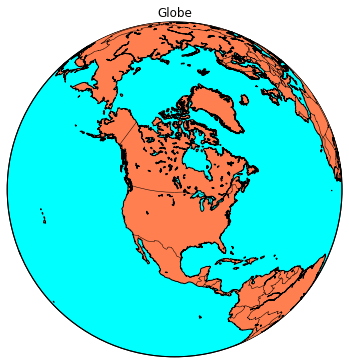

In [4]:
#How to make a globe

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np #necessary for meridians and parallels
 
globe = Basemap(projection='ortho', #ortho makes a globe
                lat_0=50, lon_0=-100, #coordinates of the center point of the map
                resolution='l', #l=low; h=high
                area_thresh=1000.0) #level of detail; lower is better
 
globe.drawcoastlines()
globe.drawcountries()
globe.fillcontinents(color='coral', lake_color='aqua')
globe.drawmapboundary(fill_color='aqua')

plt.title("Globe") #puts a title above the map
plt.show() #displays the map

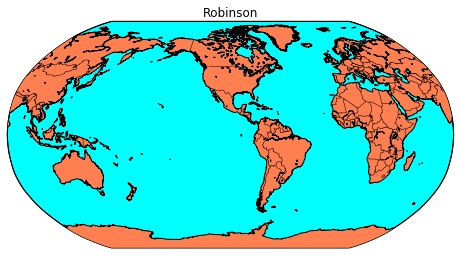

In [5]:
#How to make a Robinson Projection

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
robinson = Basemap(projection='robin', #robin makes a robinson projection
                   lat_0=0, lon_0=-100,
                   resolution='l', area_thresh=1000.0)
 
robinson.drawcoastlines()
robinson.drawcountries()
robinson.fillcontinents(color='coral', lake_color='aqua')
robinson.drawmapboundary(fill_color='aqua')
 
plt.title("Robinson")
plt.show()

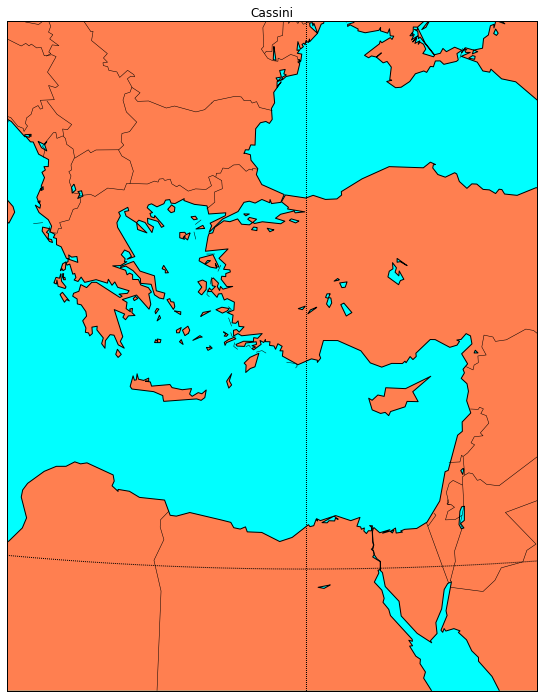

In [6]:
#How to work with a Cassini Projection

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12)) #make the map bigger than the preset size
 
cassini = Basemap(projection='cass', lat_0=36, lon_0=30,
    resolution = 'l', area_thresh = 100.0,
    llcrnrlon=20, llcrnrlat=26, #longitude, latitude of the lower left corner of the map
    urcrnrlon=40, urcrnrlat=46) #lon, lat of the upper right corner

 
cassini.drawcoastlines()
cassini.drawcountries()
cassini.fillcontinents(color='coral', lake_color='aqua')
cassini.drawmapboundary(fill_color='aqua')

cassini.drawmeridians(np.arange(0, 360, 30)) #only way to visualize the difference between Cassini and Mercator
cassini.drawparallels(np.arange(-90, 90, 30))

plt.title("Cassini")
plt.show()

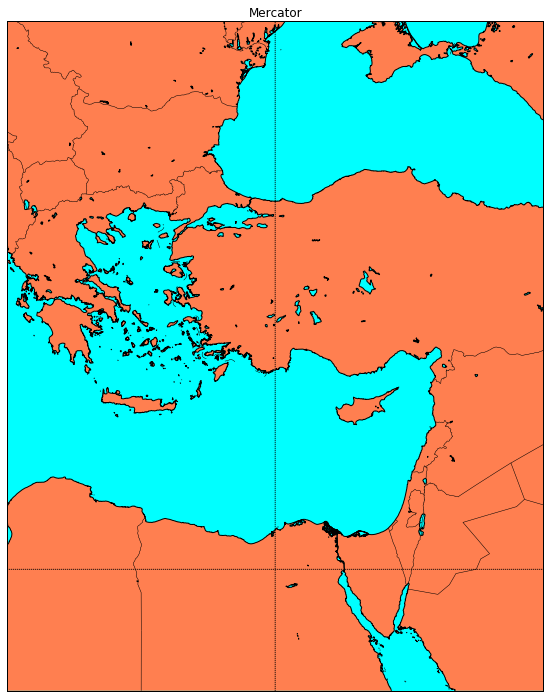

In [7]:
#How to make a Mercator Projection

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12))
 
mercator = Basemap(projection='merc', #merc makes mercator projection
                   lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1, #both settings are now on high
    llcrnrlon=20, llcrnrlat=26,
    urcrnrlon=40, urcrnrlat=46)

 
mercator.drawcoastlines()
mercator.drawcountries()
mercator.fillcontinents(color='coral', lake_color='aqua')
mercator.drawmapboundary(fill_color='aqua')

mercator.drawmeridians(np.arange(0, 360, 30))
mercator.drawparallels(np.arange(-90, 90, 30))

plt.title("Mercator") 
plt.show()

# Plotting Points with Basemap

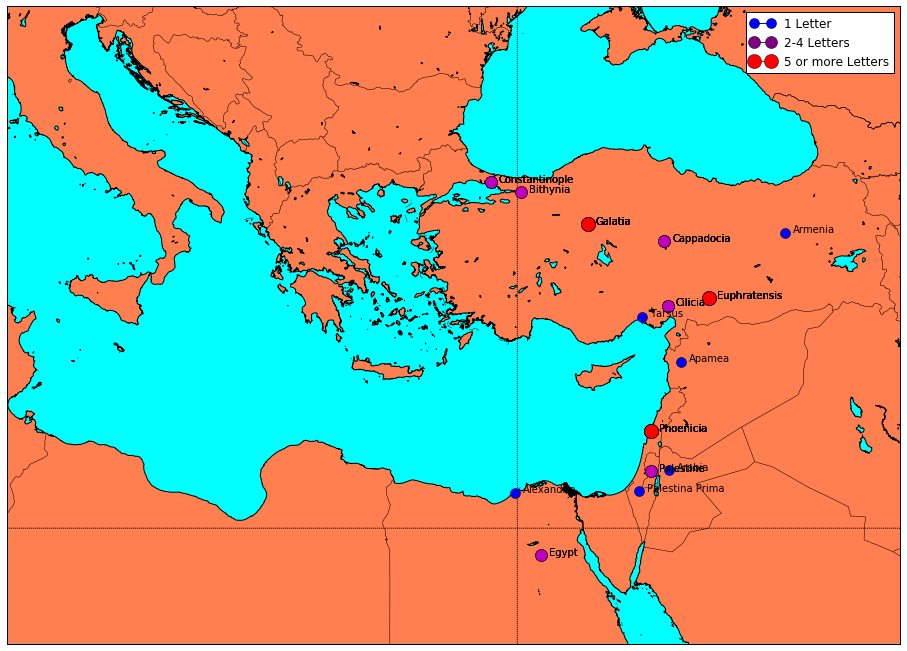

In [8]:
#How plot points from a pandas dataframe

from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(16,12))
    
libanius_letters = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=10, llcrnrlat=26,
    urcrnrlon=45, urcrnrlat=46)

 
libanius_letters.drawcoastlines()
libanius_letters.drawcountries()
libanius_letters.fillcontinents(color='coral', lake_color='aqua')
libanius_letters.drawmapboundary(fill_color='aqua')

libanius_letters.drawmeridians(np.arange(0, 360, 30))
libanius_letters.drawparallels(np.arange(-90, 90, 30))

#we assign a variable for each column of the dataframe
x,y = libanius_letters(destinations['reprLong'].values, destinations['reprLat'].values)
labels = destinations['Destination_ID']
frequencies = destinations['Total']

#We create the lables
#zip function makes an iterator that aggregates elements from each of the iterables
    #it basically reformats it in a table and associates the data of each column
#we run a for loop on the zip
for label, xpt, ypt in zip(labels, x, y):
#xpt, ypt are x,y coordinates of the label and label is the text
    plt.text(xpt+35000, ypt, label) #The offset is necessary to make the labels more clearly visible


for f, x, y in zip(frequencies, x, y):
    if f > 0 and f < 2:
        libanius_letters.plot(x, y, #coordinates of the marker
                              marker='o', #o=circe, d=diamond, etc. http://matplotlib.org/api/markers_api.html
                              color='b', #b=blue, r=red, m=mauve
                              markersize=10)
    elif f >= 2 and f < 5:
        libanius_letters.plot(x, y, marker='o',color='m', markersize=12)
    else:
        libanius_letters.plot(x, y, marker='o',color='r', markersize=14)
        

#We create a custom legend for the different categories      
blue_line = mlines.Line2D([], [], color='blue', marker='o', markersize=10, label='1 Letter')
purple_line = mlines.Line2D([], [], color='purple', marker='o', markersize=12, label='2-4 Letters')
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=14, label='5 or more Letters')
plt.legend(handles=[blue_line, purple_line, red_line])

plt.show()

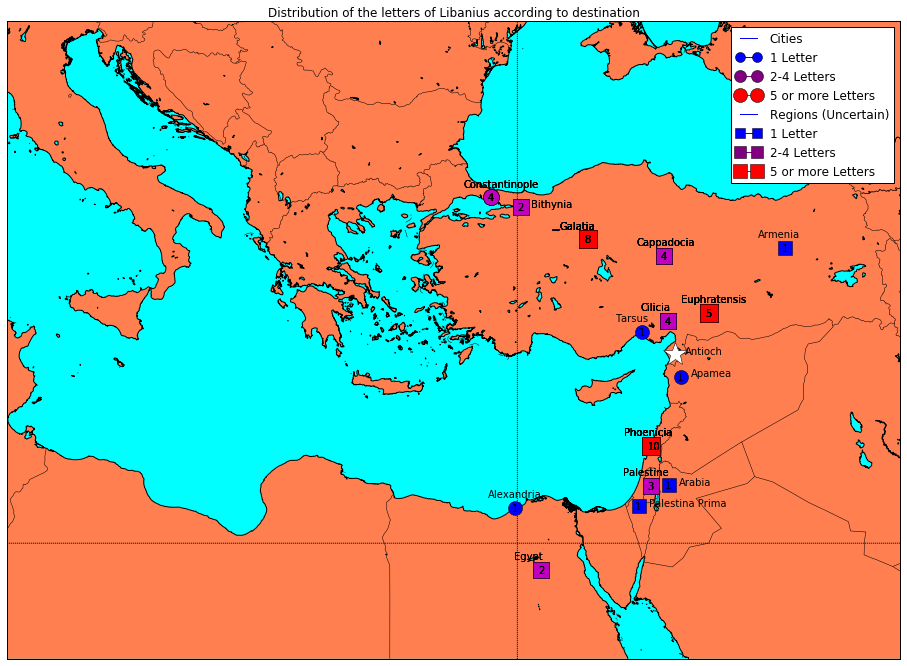

In [9]:
#Example of a more complex map where points are further differentiated

from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(16,12))
    
libanius_basemap = Basemap(projection='merc', lat_0=36, lon_0=30,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=10, llcrnrlat=26,
    urcrnrlon=45, urcrnrlat=46)

 
libanius_basemap.drawcoastlines()
libanius_basemap.drawcountries()
libanius_basemap.fillcontinents(color='coral', lake_color='aqua')
libanius_basemap.drawmapboundary(fill_color='aqua')

libanius_basemap.drawmeridians(np.arange(0, 360, 30))
libanius_basemap.drawparallels(np.arange(-90, 90, 30))

x,y = libanius_basemap(destinations['reprLong'].values, destinations['reprLat'].values)
labels = destinations['Destination_ID']
frequencies = destinations['Total']
type = destinations['Type']

for label, xpt, ypt in zip(labels, x, y):
    if label == "Bithynia":
        plt.text(xpt+45000, ypt, label)
    elif label == "Arabia":
        plt.text(xpt+45000, ypt, label)
    elif label == "Palestina Prima":
        plt.text(xpt+45000, ypt, label)
    elif label == "Apamea":
        plt.text(xpt+45000, ypt, label)
    else:
        plt.text(xpt-120000, ypt+45000, label)

for frequency, xpt, ypt in zip(frequencies, x, y):
    plt.text(xpt-15000, ypt-15000, frequency)

for f, t, x, y in zip(frequencies, type, x, y):
    if t == "City":
        if f > 0 and f < 2:
            libanius_basemap.plot(x, y, marker='o', color='b', markersize=14)
        elif f >= 2 and f < 5:
            libanius_basemap.plot(x, y, marker='o',color='m', markersize=16)
        else:
            libanius_basemap.plot(x, y, marker='o',color='r', markersize=18)
    if t == "Region":
        if f > 0 and f < 2:
            libanius_basemap.plot(x, y, marker='s', color='b', markersize=14)
        elif f >= 2 and f < 5:
            libanius_basemap.plot(x, y, marker='s',color='m', markersize=16)
        else:
            libanius_basemap.plot(x, y, marker='s',color='r', markersize=18)
            
lat2 = 36.20138
lon2 = 36.161749
x,y = libanius_basemap(lon2,lat2)
label = "Antioch"
libanius_basemap.plot(x, y, marker='*',color='w', markersize=25)
plt.text(x+45000, y, label)


#We create a custom legend for the different categories      
title_line = mlines.Line2D([], [], label='Cities')
blue_line = mlines.Line2D([], [], color='blue', marker='o', markersize=10, label='1 Letter')
purple_line = mlines.Line2D([], [], color='purple', marker='o', markersize=12, label='2-4 Letters')
red_line = mlines.Line2D([], [], color='red', marker='o', markersize=14, label='5 or more Letters')
region_line = mlines.Line2D([], [], label='Regions (Uncertain)')
blue_square = mlines.Line2D([], [], color='blue', marker='s', markersize=10, label='1 Letter')
purple_square = mlines.Line2D([], [], color='purple', marker='s', markersize=12, label='2-4 Letters')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=14, label='5 or more Letters')
plt.legend(handles=[title_line, blue_line, purple_line, red_line, region_line, blue_square, purple_square, red_square])

plt.title("Distribution of the letters of Libanius according to destination") 
plt.show()

# How to make simple maps with Folium

In [10]:
import folium

libanius_letters = folium.Map(location=[35, 22], zoom_start=5,
                              #image file for the map
                              tiles='http://{s}.tile.openstreetmap.se/hydda/base/{z}/{x}/{y}.png',
                              #credits to the creator of the map
                              attr='Tiles courtesy of <a href="http://openstreetmap.se/" target="_blank">OpenStreetMap Sweden</a> &mdash; Map data &copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a>')
            
folium.Marker([36.20138, 36.161749], #coordinates of the marker
              popup="Antioch", #text that pops up
              icon = folium.Icon(icon = 'pushpin', #compatible with bootstrap icons
                                 color ='blue')).add_to(libanius_letters)
    
libanius_letters

# Choosing a suitable georeferenced png file

Folium accepts any leaflet.js compatible custom tileset.
For examples, see:
https://leaflet-extras.github.io/leaflet-providers/preview/

In [11]:
import folium

libanius_letters = folium.Map(location=[35, 22], zoom_start=5,tiles='http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                   attr='Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community')

folium.Marker([36.20138, 36.161749], popup="Antioch",icon = folium.Icon(icon = 'pushpin', color ='blue')).add_to(libanius_letters)
    
libanius_letters

In [12]:
import folium

libanius_letters = folium.Map(location=[35, 22], zoom_start=5,tiles='http://{s}.basemaps.cartocdn.com/dark_nolabels/{z}/{x}/{y}.png',
                   attr='&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')

folium.Marker([36.20138, 36.161749], popup="Antioch",icon = folium.Icon(icon = 'pushpin', color ='blue')).add_to(libanius_letters)
    
libanius_letters